# 顔だけ抽出しセーブします

In [25]:
import face_recognition
import cv2
import sys
import os.path
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
def detect_and_crop_anime_face(dir_path, dir_save_path, cascade_file = "lbpcascade_animeface.xml"):
    
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)
    cascade = cv2.CascadeClassifier(cascade_file)
    
    
    file_list = os.listdir(dir_path)
    
    for file in file_list:
        filename = os.path.join(dir_path, file)
    
        image = cv2.imread(filename, cv2.IMREAD_COLOR)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)

        faces = cascade.detectMultiScale(gray,
                                         # detector options
                                         scaleFactor = 1.1,
                                         minNeighbors = 5,
                                         minSize = (24, 24))


        for idx, face in enumerate(faces):
        
            
        
            x, y, w, h = face
            # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)　顔の部分に線を引く

            crop_image = image[y:y+h, x:x+w, :]
            
            cv2.imwrite(dir_save_path + '/' + str(idx) + '_' + file, crop_image)
            print(filename + '　写真の顔をセーブしました')
            
            
        if len(faces) == 0:
            print(filename + '　写真の顔は見つかりませんでした')
        


detect_and_crop_anime_face('ani_images', 'face_ani_images')

ani_images/001_size6.jpg　写真の顔は見つかりませんでした
ani_images/mainvisual02.jpg　写真の顔をセーブしました
ani_images/342304.jpg　写真の顔をセーブしました
ani_images/342304.jpg　写真の顔をセーブしました
ani_images/342304.jpg　写真の顔をセーブしました
ani_images/unnamed.jpg　写真の顔をセーブしました
ani_images/unnamed.jpg　写真の顔をセーブしました
ani_images/unnamed.jpg　写真の顔をセーブしました
ani_images/unnamed.jpg　写真の顔をセーブしました
ani_images/001.jpg　写真の顔をセーブしました
ani_images/001.jpg　写真の顔をセーブしました
ani_images/001.jpg　写真の顔をセーブしました
ani_images/3.jpg　写真の顔をセーブしました
ani_images/images.jpeg　写真の顔をセーブしました
ani_images/unnamed (2).jpg　写真の顔をセーブしました
ani_images/unnamed (2).jpg　写真の顔をセーブしました
ani_images/unnamed (2).jpg　写真の顔をセーブしました
ani_images/unnamed (2).jpg　写真の顔をセーブしました
ani_images/wefef.jpg　写真の顔をセーブしました
ani_images/wefef.jpg　写真の顔をセーブしました
ani_images/i14398658060.jpg　写真の顔をセーブしました
ani_images/i14398658060.jpg　写真の顔をセーブしました
ani_images/wef.jpg　写真の顔をセーブしました
ani_images/wef.jpg　写真の顔をセーブしました
ani_images/wef.jpg　写真の顔をセーブしました
ani_images/wef.jpg　写真の顔をセーブしました
ani_images/2.jpg　写真の顔をセーブしました
ani_images/ph01.jpg　写真の顔をセーブしました
ani_im

アニメの写真です   
きっと見たアニメですが名前はわかりません

In [7]:
def changeName(path, cName):

    for idx, file in enumerate(os.listdir(path)):
        filename_end = os.path.splitext(file)[1]   
        os.rename(path+file, path+str(cName)+str(idx)+filename_end)
        
changeName('face_ani_images/', 'face_')

名前を書くのが時間がかかると思うので適当に名付けをします

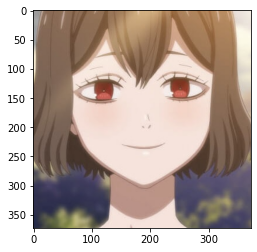

In [20]:
dir_path = 'face_ani_images'
file_list = os.listdir(dir_path)
for file in file_list:

    image = cv2.imread(dir_path + '/' + file, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    break
   

よくできたみたいです

In [26]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [27]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        face = os.path.join(dir_path, file)
        
        name = file[:file.find('.')]
        face_embed = get_face_embedding(face)

        embedding_dict[name] = face_embed[0]
        
    return embedding_dict

In [28]:
dir_path = 'face_ani_images'
embedding_dict = get_face_embedding_dict(dir_path)

TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.fhog_object_detector, image: array, upsample_num_times: int=0) -> _dlib_pybind11.rectangles

Invoked with: <_dlib_pybind11.fhog_object_detector object at 0x7f49806fdef0>, 'face_ani_images/face_0.jpg', 1